In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/beer-servings.csv',index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
data.shape

(193, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [ ]:
#find missing values
data.isna().sum()

,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


In [ ]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
cols_selected=data[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]

In [ ]:
cols_selected.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9


In [ ]:
cols_selected.isna().sum()

,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
 # creating instance
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [ ]:
# fit dataset
imputer=imputer.fit(cols_selected)

In [ ]:
# transform
cols_selected=imputer.transform(cols_selected)

In [ ]:
# Check data type
type(cols_selected)

numpy.ndarray

In [ ]:
# convert array into data frame
cols_selected=pd.DataFrame(cols_selected,columns=['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'])

In [ ]:
type(cols_selected)

pandas.core.frame.DataFrame

In [ ]:
# again check null value
cols_selected.isna().sum()

,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


In [ ]:
# drop the column from data
data=data.drop(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],axis=1)

In [ ]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [ ]:
# join the missing value handled columns_data with original data
data=pd.concat([data,cols_selected],axis=1)

In [ ]:
data.head()

,country,continent,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,Asia,0.0,0.0,0.0,0.0
1,Albania,Europe,89.0,132.0,54.0,4.9
2,Algeria,Africa,25.0,0.0,14.0,0.7
3,Andorra,Europe,245.0,138.0,312.0,12.4
4,Angola,Africa,217.0,57.0,45.0,5.9


In [ ]:
data.isna().sum()

,0
country,0
continent,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


In [ ]:
# Using Pandas----handling missing values
df=pd.read_csv('/content/beer-servings.csv',index_col='Unnamed: 0')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
df.isna().sum()

,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


In [ ]:
# Using Pandas

In [ ]:
# distribution check--identify mean or median
freq_graph=df.select_dtypes(include='float')

array([[<Axes: title={'center': 'beer_servings'}>,
        <Axes: title={'center': 'spirit_servings'}>],
       [<Axes: title={'center': 'wine_servings'}>,
        <Axes: title={'center': 'total_litres_of_pure_alcohol'}>]],
      dtype=object)

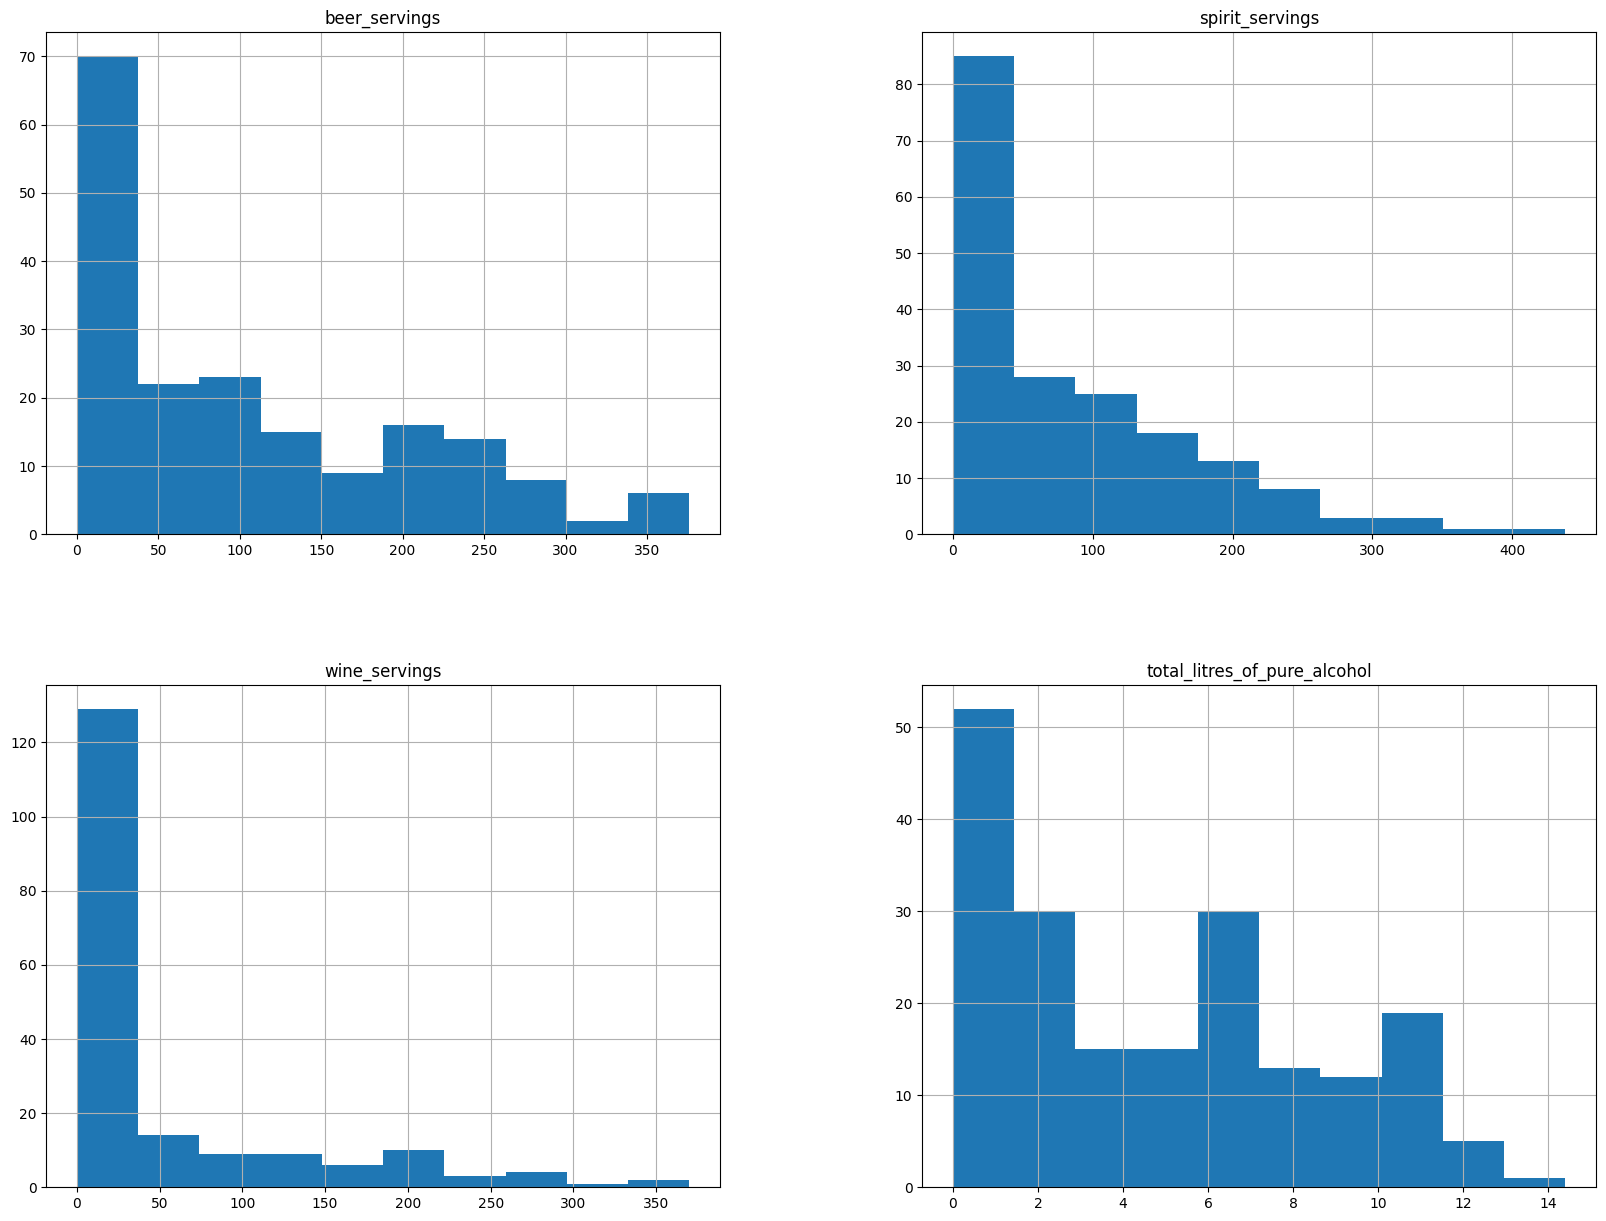

In [ ]:
freq_graph.hist(figsize=[20,15])

In [ ]:
plt.show()

In [ ]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
df['beer_servings']=df['beer_servings'].fillna(df['beer_servings'].median())

In [ ]:
df['beer_servings'].isna().sum()

0

In [ ]:
for i in ['spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
       df[i]=df[i].fillna(df[i].median())

In [ ]:
df.isna().sum()

,0
country,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
continent,0
